# Autoregressive moving average

### Import python libraries

In [2]:
import pandas as pd
import numpy as np
import os
from statsmodels.tsa.arima_model import ARMA
import matplotlib.pyplot as plt 
import seaborn as sns

In [3]:
sns.set()
plt.style.use('ggplot')
plt.rcParams['figure.figsize'] = (14, 8)

### Simulate return series with autoregressive properties

In [4]:
from statsmodels.tsa.arima_process import ArmaProcess
np.random.seed(200)

ar_params = np.array([1, -0.5])
ma_params = np.array([1, -0.3])
ret = ArmaProcess(ar_params, ma_params).generate_sample(nsample=5*252)

ret = pd.Series(ret)
drift = 100
price = pd.Series(np.cumsum(ret)) + drift

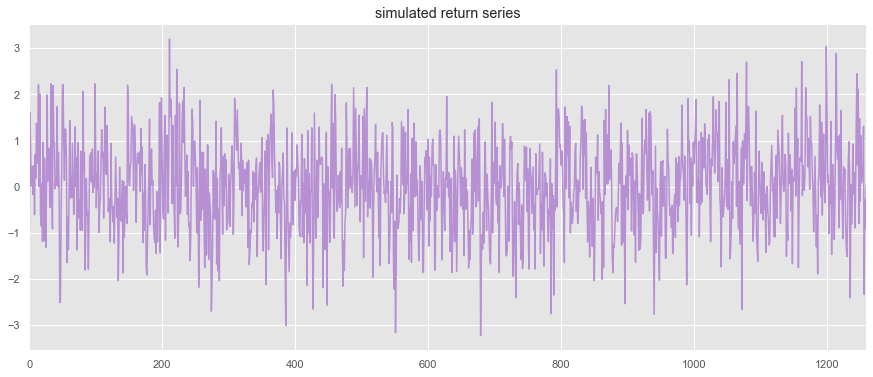

In [5]:
ret.plot(figsize=(15, 6), color=sns.xkcd_rgb["pale purple"], title="simulated return series")
plt.show()

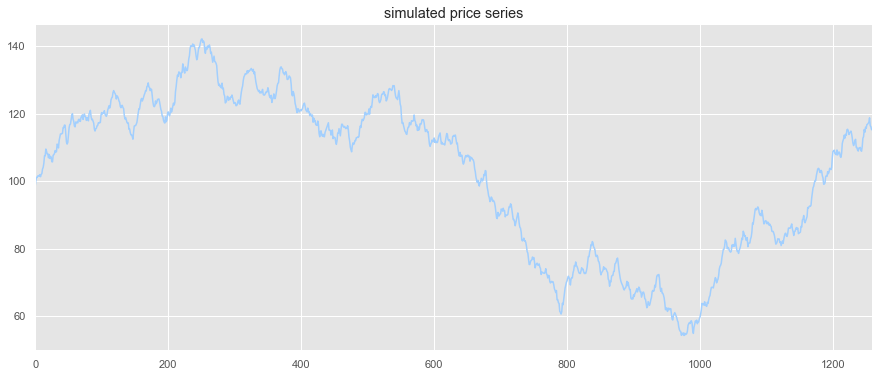

In [6]:
price.plot(figsize=(15,6), color=sns.xkcd_rgb["baby blue"], title="simulated price series")
plt.show()

### Log returns

In [25]:
lret = np.log(price) - np.log(price.shift(1))
lret = lret[1:]
lret_s = pd.Series(lret)

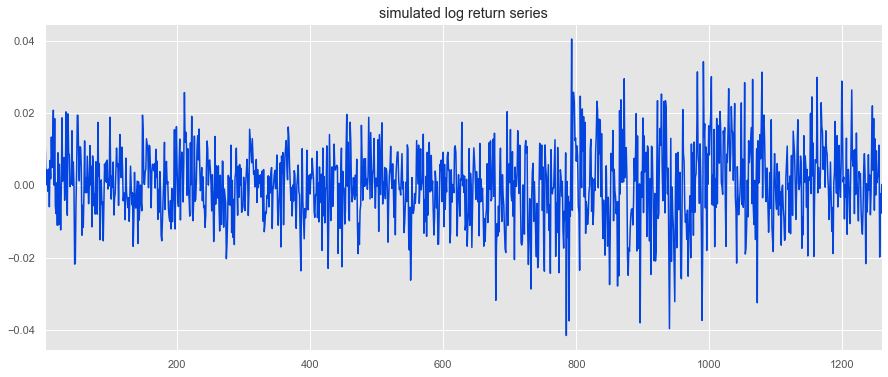

In [26]:
lret_s.plot(figsize=(15,6), color=sns.xkcd_rgb["blue"], title="simulated log return series")
plt.show()

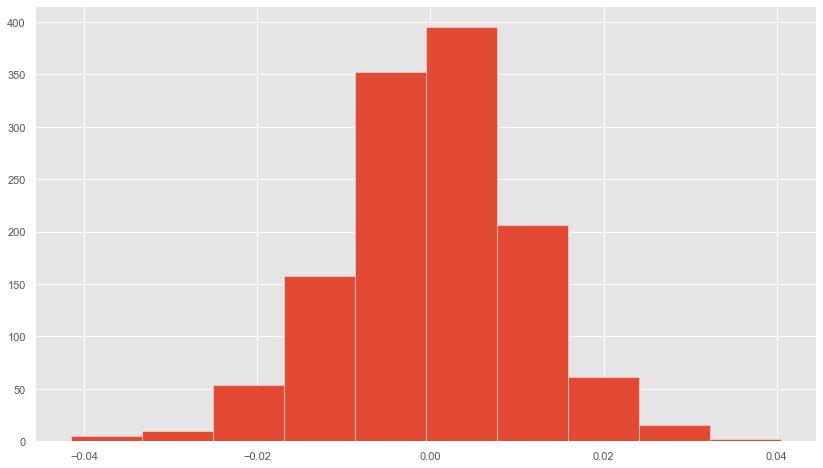

In [28]:
lret_s.hist();

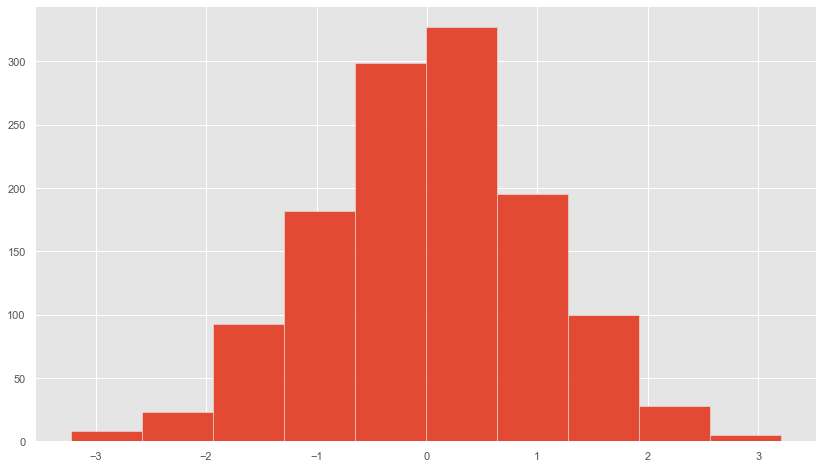

In [29]:
ret.hist();

### Autocorrelation

In [30]:
from statsmodels.graphics.tsaplots import plot_acf

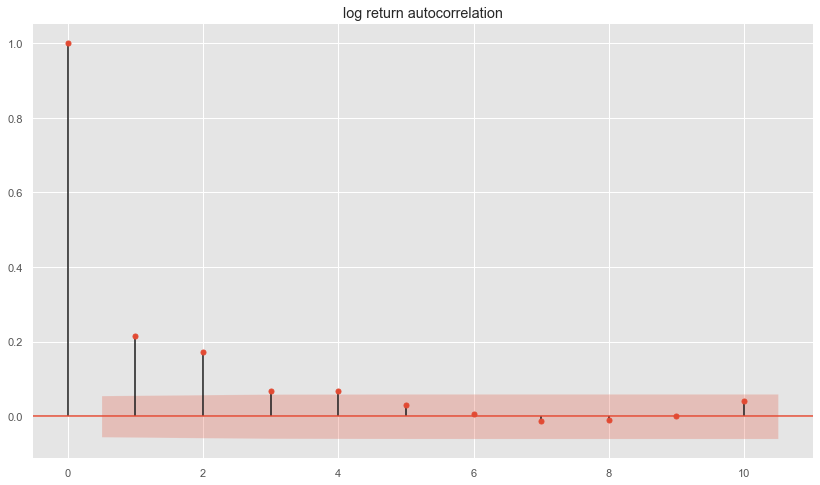

In [36]:
_ = plot_acf(lret, lags=10, title='log return autocorrelation')

### Plot partial autocorrelation

In [37]:
from statsmodels.graphics.tsaplots import plot_pacf

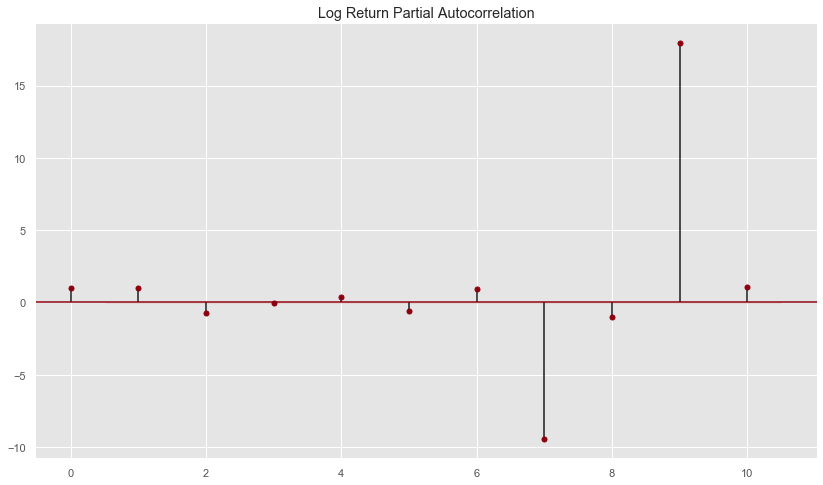

In [46]:
_ = plot_pacf(price, lags=10, title='Log Return Partial Autocorrelation', color=sns.xkcd_rgb["crimson"])

### Ljung-Box Test

In [40]:
from statsmodels.stats.diagnostic import acorr_ljungbox

In [44]:
lb_test_stat, lb_p_value = acorr_ljungbox(lret, lags=20)
print(lb_p_value < 0.05)

[ True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True]


### Fit an ARMA model

In [48]:
from statsmodels.tsa.arima_model import ARMA

In [62]:
AR_lag_p = 1
MA_lag_q = 1
order = (AR_lag_p, MA_lag_q)
arma_model = ARMA(lret.values, order=order)
arma_result = arma_model.fit()
arma_pred = pd.Series(arma_result.fittedvalues)

### View fitted predictions against actual values

Fitted AR parameter 0.65, MA parameter -0.45


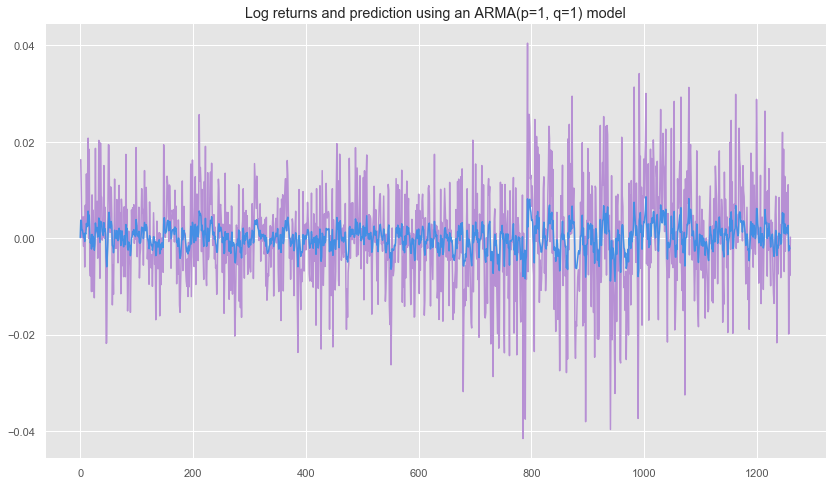

In [64]:
plt.plot(lret, color=sns.xkcd_rgb["pale purple"])
plt.plot(arma_pred, color=sns.xkcd_rgb["dark sky blue"])
plt.title('Log returns and prediction using an ARMA(p=1, q=1) model')
print(f"Fitted AR parameter {arma_result.arparams[0]:.2f}, MA parameter {arma_result.maparams[0]:.2f}")

### ARIMA

In [55]:
from statsmodels.tsa.arima_model import ARIMA

In [82]:
AR_lag_p = 1
MA_lag_q = 1
d = 1
order = (AR_lag_p, d, MA_lag_q)
arima_model = ARIMA(lret.values, order=order)
arima_result = arima_model.fit()
arparams = arima_result.arparams
maparams = arima_result.maparams
arima_pred = pd.Series(arima_result.fittedvalues)

Fitted AR parameter 0.21, MA parameter -0.98


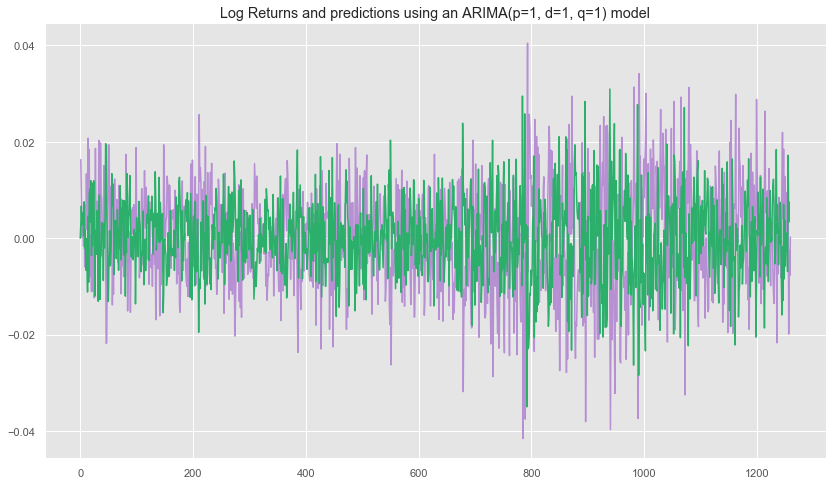

In [84]:
plt.plot(lret, color=sns.xkcd_rgb["pale purple"])
plt.plot(arima_pred, color=sns.xkcd_rgb["jade green"])
plt.title('Log Returns and predictions using an ARIMA(p=1, d=1, q=1) model');
print(f"Fitted AR parameter {arima_result.arparams[0]:.2f}, MA parameter {arima_result.maparams[0]:.2f}")